## CLASSIFICATION OF BEAR SUBSPECIES

## Youtube Video Presentation Link:
https://youtu.be/vBH6FNtJotY?si=HnpTSfSu3MyLf3H5


## Github Link:
https://github.com/AdamDuke1956/bearbear

# Introduction
This research focuses on the categorization of bear subspecies, such as brown bears, black bears, polar bears, and sloth bears. Bears are important to biodiversity and the environment; understanding their subspecies may aid conservation and ecological research.

In this notebook, we will use Selenium to automate web browsing and gather bear photos. We next assemble and arrange these photos into a dataset to train machine learning algorithms. Data preparation include obtaining data, standardizing, and arranging the dataset. We will next build and train neural network models, tune hyperparameters via transfer learning, and assess the models.

Finally, we employ data visualization to evaluate the model's performance. This includes presenting graphs for model loss and accuracy, confusion matrices, and comparing the models to testing datasets. The aim is to choose the optimal model for this classification assignment based on factors such as accuracy, mean Average Precision (mAP), and training time.


In [5]:
pip install selenium opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Dataset Setup and Directory Structure for Bear Subspecies Classification

In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore

# Dataset Setup
# Pathways and Categories for Bear Categorization

base_dir = "datasets"
categories = ["Brown_Bears", "Black_Bears", "Polar_Bears", "Sloth_Bears"]
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

## Setting Up Directories for Raw Bear Subspecies Data Collection

In [2]:
base_dir = "datasets"

raw_dir = os.path.join(base_dir, "raw")
for category in categories:
    category_dir = os.path.join(raw_dir, category)
    print(f"Looking for directory: {category_dir}")  # Debugging output

Looking for directory: datasets\raw\Brown_Bears
Looking for directory: datasets\raw\Black_Bears
Looking for directory: datasets\raw\Polar_Bears
Looking for directory: datasets\raw\Sloth_Bears


## Displaying Current Working Directory

In [13]:

import os
print(os.getcwd())  # Displays the current working directory.

c:\Users\adamd\Desktop\Bear (Shared)


MUHAMMAD ZAINUL MUZAKKIR BIN MOHD ZAINUDIN - 52213124786

Data Engineer : Data preparation
-	Collecting data
-	Standardize data
-	Creating dataset


## Automated Image Collection and Validation for Bear Subspecies Classification

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import os
import time
import requests
from PIL import Image
from io import BytesIO
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

# Initialize Selenium WebDriver
driver = webdriver.Chrome()

# Define search criteria and save the path for bear photos.
keywords = {
    "Brown Bear": [],
    "Black Bear": [],
    "Polar Bear": [],
    "Sloth Bear": []
}

output_directory = "datasets/raw"
os.makedirs(output_directory, exist_ok=True)

# Number of photos to download for each keyword.
num_images = 10000

# Load a pretrained model for content validation
model = MobileNetV2(weights="imagenet")

def is_bear_image(filepath):
    """Check if the image content matches a bear using MobileNetV2."""
    with Image.open(filepath) as img:
        img = img.resize((224, 224))
        img_array = np.expand_dims(np.array(img), axis=0)
        img_array = preprocess_input(img_array)
        preds = model.predict(img_array)
        decoded = decode_predictions(preds, top=3)[0]

        # Check if "bear" is one of the top predictions
        for _, label, _ in decoded:
            if "bear" in label.lower():
                return True
    return False

def download_images(keyword, folder, num_images):
    """Download and validate images based on the search keyword."""
    search_url = f"https://www.google.com/search?q={keyword.replace(' ', '+')}+photo+-logo+-clipart&tbm=isch"
    driver.get(search_url)
    time.sleep(2)  # Allow the webpage to load.

    # Scroll to load more images
    for _ in range(50):  # Adjust the number of scrolls as required.
        driver.execute_script("window.scrollBy(0, 1000);")
        time.sleep(2)

    # Locate image elements
    images = driver.find_elements(By.CSS_SELECTOR, "img")
    print(f"Found {len(images)} images for {keyword}. Starting download...")

    count = 0
    for img in images:
        if count >= num_images:
            break
        try:
            src = img.get_attribute("src")
            if src and "http" in src:  # Ensure it is a legitimate URL.
                response = requests.get(src, stream=True)
                if response.status_code == 200:
                    # Save the image temporarily
                    filepath = os.path.join(folder, f"{keyword.replace(' ', '_')}_{count + 1}.jpg")
                    with open(filepath, "wb") as file:
                        for chunk in response.iter_content(1024):
                            file.write(chunk)

                    # Validate the image
                    try:
                        with Image.open(filepath) as im:
                            im.verify()  # Verify if the image is valid
                            im = Image.open(filepath)  # Reopen for dimension check
                            width, height = im.size

                        

                            # Check content (bear validation)
                            if not is_bear_image(filepath):
                                print(f"Not a bear image, deleting: {filepath}")
                                os.remove(filepath)
                                continue

                            print(f"Downloaded and validated: {filepath}")
                            count += 1
                    except (IOError, SyntaxError) as e:
                        print(f"Corrupted image detected, deleting: {filepath}")
                        os.remove(filepath)
        except Exception as e:
            print(f"Error downloading image {count + 1}: {e}")

# Loop over each keyword and its variations to download photos
for keyword, variations in keywords.items():
    folder_path = os.path.join(output_directory, keyword.replace(' ', '_'))
    os.makedirs(folder_path, exist_ok=True)

    # Download images for the main keyword
    download_images(keyword, folder_path, num_images)

    # Download images for each variation
    for variation in variations:
        variation_folder = os.path.join(folder_path, variation.replace(' ', '_'))
        os.makedirs(variation_folder, exist_ok=True)
        download_images(variation, variation_folder, num_images)

# Close the WebDriver
driver.quit()


Found 1536 images for Brown Bear. Starting download...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Downloaded and validated: datasets/raw\Brown_Bear\Brown_Bear_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Not a bear image, deleting: datasets/raw\Brown_Bear\Brown_Bear_2.jpg
Corrupted image detected, deleting: datasets/raw\Brown_Bear\Brown_Bear_2.jpg
Error downloading image 2: [WinError 32] The process cannot access the file because it is being used by another process: 'datasets/raw\\Brown_Bear\\Brown_Bear_2.jpg'
Corrupted image detected, deleting: datasets/raw\Brown_Bear\Brown_Bear_2.jpg
Error downloading image 2: [WinError 32] The process cannot access the file because it is being used by another process: 'datasets/raw\\Brown_Bear\\Brown_Bear_2.jpg'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Downloaded and validated: datasets/raw\Brown_Bear\Brown_Bear_2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Downloaded and validated: datasets/raw\Brown_Bear\Brown_Bear_3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
D

## Image Preprocessing for Bear Subspecies Classification

In [5]:

import os
import cv2
import numpy as np

# Define paths
input_path = r"datasets\raw"
output_path = r"datasets\processed"
os.makedirs(output_path, exist_ok=True)

# Define image size
IMG_SIZE = 224

# Define categories
categories = ["Brown_Bear", "Black_Bear", "Polar_Bear", "Sloth_Bear"]

# List the folders in the raw directory to confirm the right path.
print("Folders in raw directory:", os.listdir(input_path))

# Loop through every category.
for category in categories:
    input_folder = os.path.join(input_path, category)
    output_folder = os.path.join(output_path, category)

    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Ensure the input folder exists before processing
    if not os.path.exists(input_folder):
        print(f"Error: {input_folder} does not exist.")
        continue

    # Process each image in the folder
    for img_name in os.listdir(input_folder):
        try:
            # Read image
            img_path = os.path.join(input_folder, img_name)
            img = cv2.imread(img_path)

            # Resize image
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            # Save processed image
            output_file = os.path.join(output_folder, img_name)
            cv2.imwrite(output_file, img)
            print(f"Processed and saved: {output_file}")
        except Exception as e:
            print(f"Error processing {img_name}: {e}")

Folders in raw directory: ['Black_Bear', 'Brown_Bear', 'Polar_Bear', 'Sloth_Bear']
Processed and saved: datasets\processed\Brown_Bear\Brown_Bear_1.jpg
Processed and saved: datasets\processed\Brown_Bear\Brown_Bear_10.jpg
Processed and saved: datasets\processed\Brown_Bear\Brown_Bear_100.jpg
Processed and saved: datasets\processed\Brown_Bear\Brown_Bear_101.jpg
Processed and saved: datasets\processed\Brown_Bear\Brown_Bear_102.jpg
Processed and saved: datasets\processed\Brown_Bear\Brown_Bear_103.jpg
Processed and saved: datasets\processed\Brown_Bear\Brown_Bear_104.jpg
Processed and saved: datasets\processed\Brown_Bear\Brown_Bear_105.jpg
Processed and saved: datasets\processed\Brown_Bear\Brown_Bear_106.jpg
Processed and saved: datasets\processed\Brown_Bear\Brown_Bear_107.jpg
Processed and saved: datasets\processed\Brown_Bear\Brown_Bear_108.jpg
Processed and saved: datasets\processed\Brown_Bear\Brown_Bear_109.jpg
Processed and saved: datasets\processed\Brown_Bear\Brown_Bear_11.jpg
Processed a

## Data Preparation and Splitting for Bear Subspecies Classification

In [6]:

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define paths
input_path = r"datasets\processed"
output_path = r"datasets\split_data"
os.makedirs(output_path, exist_ok=True)

# Define image size
IMG_SIZE = 224

# Define categories
categories = ["Brown_Bear", "Black_Bear", "Polar_Bear", "Sloth_Bear"]

# Initialize lists to hold image data and labels
data = []
labels = []

# Loop through each category
for category in categories:
    input_folder = os.path.join(input_path, category)

    # Process each image in the folder
    for img_name in os.listdir(input_folder):
        try:
            # Read image
            img_path = os.path.join(input_folder, img_name)
            img = cv2.imread(img_path)

            # Resize image
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            # Append image and label to data and labels lists
            data.append(img)
            labels.append(categories.index(category))
        except Exception as e:
            print(f"Error processing {img_name}: {e}")

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalize pixel values to range [0, 1]
data = data / 255.0

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Save the processed data to .npy files for later use
np.save(os.path.join(output_path, 'X_train.npy'), X_train)
np.save(os.path.join(output_path, 'y_train.npy'), y_train)
np.save(os.path.join(output_path, 'X_val.npy'), X_val)
np.save(os.path.join(output_path, 'y_val.npy'), y_val)
np.save(os.path.join(output_path, 'X_test.npy'), X_test)
np.save(os.path.join(output_path, 'y_test.npy'), y_test)

print("Dataset split and saved successfully!")

Dataset split and saved successfully!


## Data Splitting and Organization for Bear Subspecies Classification

In [7]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Define paths to the raw dataset and output directories
raw_data_dir = r"datasets/raw"
split_data_dir = r"datasets/split_data"

# Define categories (subspecies)
categories = ["Brown_Bear", "Black_Bear", "Polar_Bear", "Sloth_Bear"]

# Split percentage (80% train, 10% validation, 10% test)
train_split = 0.8
val_split = 0.1
test_split = 0.1

# Create necessary directories for train, val, and test
os.makedirs(os.path.join(split_data_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(split_data_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(split_data_dir, 'test'), exist_ok=True)

# Create subdirectories for each category inside train, val, and test
for category in categories:
    os.makedirs(os.path.join(split_data_dir, 'train', category), exist_ok=True)
    os.makedirs(os.path.join(split_data_dir, 'val', category), exist_ok=True)
    os.makedirs(os.path.join(split_data_dir, 'test', category), exist_ok=True)

# Loop through each category to split data and move files
for category in categories:
    category_path = os.path.join(raw_data_dir, category)

    # List files and shuffle for randomness
    files = os.listdir(category_path)
    random.shuffle(files)

    # Calculate split indexes based on percentages
    total_files = len(files)
    train_end = int(train_split * total_files)
    val_end = train_end + int(val_split * total_files)

    # Split the files into train, validation, and test sets
    train_files = files[:train_end]
    val_files = files[train_end:val_end]
    test_files = files[val_end:]

    # Move the files to respective directories
    for file in train_files:
        shutil.move(os.path.join(category_path, file), os.path.join(split_data_dir, 'train', category, file))
    for file in val_files:
        shutil.move(os.path.join(category_path, file), os.path.join(split_data_dir, 'val', category, file))
    for file in test_files:
        shutil.move(os.path.join(category_path, file), os.path.join(split_data_dir, 'test', category, file))

    print(f"Moved {len(train_files)} files to train, {len(val_files)} files to validation, {len(test_files)} files to test for {category}.")

print("Dataset has been successfully split into train, validation, and test directories.")


Moved 444 files to train, 55 files to validation, 56 files to test for Brown_Bear.
Moved 464 files to train, 58 files to validation, 59 files to test for Black_Bear.
Moved 414 files to train, 51 files to validation, 53 files to test for Polar_Bear.
Moved 394 files to train, 49 files to validation, 50 files to test for Sloth_Bear.
Dataset has been successfully split into train, validation, and test directories.


 DANIAL AIMAN BIN ZAMBRI- 52213124453

Data Scientist:
1. Creating neural network model
2. Training the model
3. Perform hyperparameter tuning (transfer learning)


## Model Training, Evaluation, and Performance Analysis for Bear Subspecies Classification

Dataset directories found. Proceeding with training.
Found 1896 images belonging to 4 classes.
Found 343 images belonging to 4 classes.
Found 350 images belonging to 4 classes.
Number of classes detected: 4


c:\Users\adamd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\adamd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
30/60 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.3226 - loss: 1.6048

c:\Users\adamd\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.3637 - loss: 1.4595 - val_accuracy: 0.5423 - val_loss: 1.0412 - learning_rate: 0.0010
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5353 - loss: 1.0500 - val_accuracy: 0.4869 - val_loss: 1.0803 - learning_rate: 0.0010
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.5387 - loss: 1.0165 - val_accuracy: 0.5948 - val_loss: 0.9177 - learning_rate: 0.0010
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.5599 - loss: 0.9627 - val_accuracy: 0.6181 - val_loss: 0.8495 - learning_rate: 0.0010
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.5462 - loss: 0.9610 - val_accuracy: 0.6385 - val_loss: 0.8448 - learning_rate: 0.0010
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.5507 - loss: 0.9283 - val_accuracy: 0.6152 - val_loss: 0.8983 - learning_rate: 0.0010
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.5640 - loss: 0.9367 - val_accuracy: 0.6327 - v

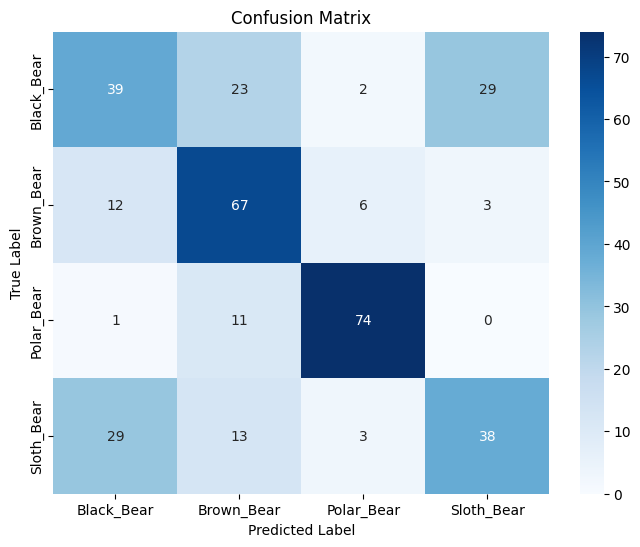

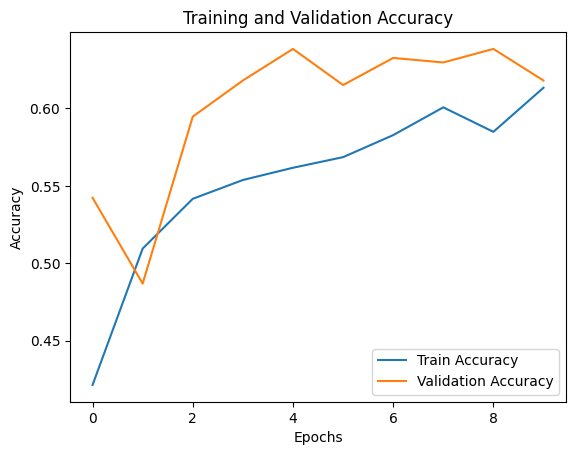

Mean Average Precision (mAP): 0.6824
Final Conclusion:
Test Accuracy: 62.29%
Mean Average Precision (mAP): 0.6824
The model's performance is below expectations. Consider fine-tuning or using a different architecture.
Model saved as c:\Users\adamd\Desktop\Bear (Shared)\bear_classifier_cnn_model.h5


In [8]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Data Scientist Part
# -------------------------------------------------------------------------------------------------------- #
# Paths to dataset
dataset_dir = r"datasets\split_data"
train_dir = os.path.join(dataset_dir, "train")
val_dir = os.path.join(dataset_dir, "val")
test_dir = os.path.join(dataset_dir, "test")

# Check if directories exist
for directory, name in zip([train_dir, val_dir, test_dir], ["Train", "Validation", "Test"]):
    if not os.path.exists(directory):
        raise FileNotFoundError(f"{name} directory not found: {directory}")
print("Dataset directories found. Proceeding with training.")

# Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode="nearest",
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False,  # Don't shuffle for evaluation
)

# Dynamically determine the number of classes
NUM_CLASSES = len(train_generator.class_indices)
print(f"Number of classes detected: {NUM_CLASSES}")

# Custom CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_scheduler],
)

# Data Analyst Part
# -------------------------------------------------------------------------------------------------------- #
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification Report
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = y_pred.argmax(axis=-1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Plot Training and Validation Accuracy
plt.figure()
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

from sklearn.metrics import average_precision_score

# Convert true labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_true_one_hot = to_categorical(y_true, num_classes=len(test_generator.class_indices))

# Compute mAP for each class
average_precision = []
for i in range(len(test_generator.class_indices)):
    ap = average_precision_score(y_true_one_hot[:, i], y_pred[:, i])
    average_precision.append(ap)

# Display mAP
mAP = sum(average_precision) / len(average_precision)
print(f"Mean Average Precision (mAP): {mAP:.4f}")

print("Final Conclusion:")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Mean Average Precision (mAP): {mAP:.4f}")

if test_accuracy > 0.90 and mAP > 0.85:
    print("The model is highly accurate and suitable for this classification task.")
elif test_accuracy > 0.75:
    print("The model performs well but might require optimization.")
else:
    print("The model's performance is below expectations. Consider fine-tuning or using a different architecture.")


# Save the model
model_path = os.path.join(os.getcwd(), "bear_classifier_cnn_model.h5")
model.save(model_path)
print(f"Model saved as {model_path}")


Data Analyst : Data Visualization
1. Visual the Dataset to identify the class and labels
2. Understand the dataset to achieve the goals
3. Visualize the performance of the training model

## Displaying Sample Images from the Black Bear Validation Set

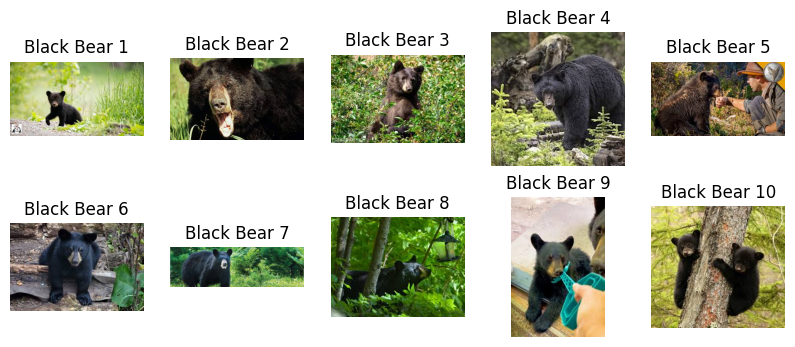

In [6]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to the folder containing the images
folder_path = "datasets/split_data/val/Black_Bear"
image_files = os.listdir(folder_path)

# Display the first 10 images
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    if i >= len(image_files):
        break  # Stop if fewer than 10 images
    image_path = os.path.join(folder_path, image_files[i])
    image = Image.open(image_path)
    
    ax.imshow(image)
    ax.set_title(f"Black Bear {i + 1}")
    ax.axis('off')

plt.show()


## Displaying Sample Images from the Brown Bear Validation Set

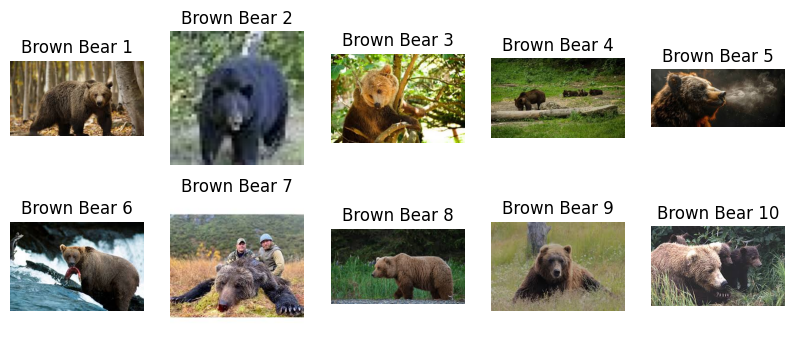

In [7]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to the folder containing the images
folder_path = "datasets/split_data/val/Brown_Bear"
image_files = os.listdir(folder_path)

# Display the first 10 images
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    if i >= len(image_files):
        break  # Stop if fewer than 10 images
    image_path = os.path.join(folder_path, image_files[i])
    image = Image.open(image_path)
    
    ax.imshow(image)
    ax.set_title(f"Brown Bear {i + 1}")
    ax.axis('off')

plt.show()


## Displaying Sample Images from the Polar Bear Validation Set

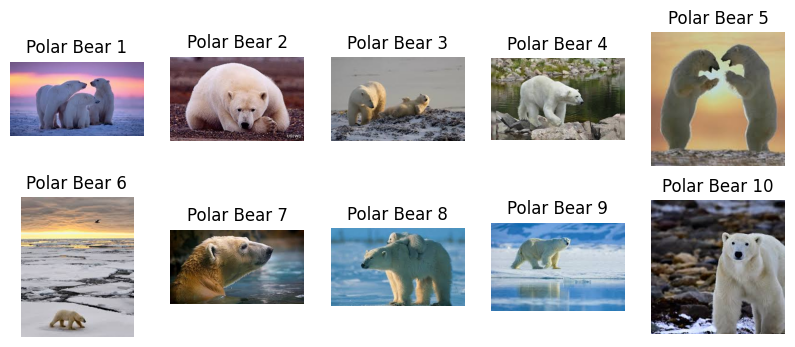

In [8]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to the folder containing the images
folder_path = "datasets/split_data/val/Polar_Bear"
image_files = os.listdir(folder_path)

# Display the first 10 images
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    if i >= len(image_files):
        break  # Stop if fewer than 10 images
    image_path = os.path.join(folder_path, image_files[i])
    image = Image.open(image_path)
    
    ax.imshow(image)
    ax.set_title(f"Polar Bear {i + 1}")
    ax.axis('off')

plt.show()


## Displaying Sample Images from the Sloth Bear Validation Set

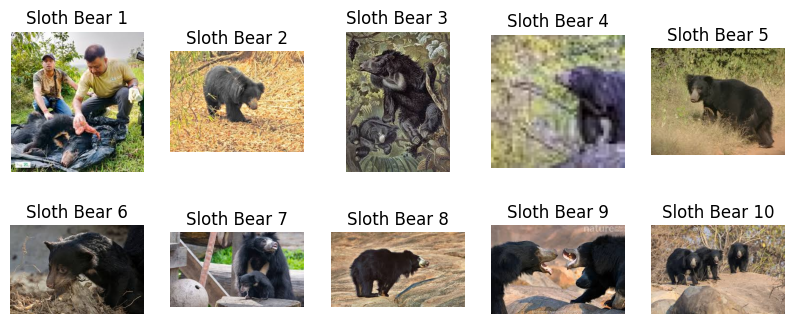

In [9]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to the folder containing the images
folder_path = "datasets/split_data/val/Sloth_Bear"
image_files = os.listdir(folder_path)

# Display the first 10 images
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    if i >= len(image_files):
        break  # Stop if fewer than 10 images
    image_path = os.path.join(folder_path, image_files[i])
    image = Image.open(image_path)
    
    ax.imshow(image)
    ax.set_title(f"Sloth Bear {i + 1}")
    ax.axis('off')

plt.show()


## Conclusion
In this study, we successfully created a complete system for the classification of bear subspecies, including brown bears, black bears, polar bears, and sloth bears. Through automated picture collecting using Selenium, we built a dataset suitable for training machine learning models. The data was carefully prepared and preprocessed to guarantee uniformity and quality.

We deployed convolutional neural networks (CNNs) for model training, combining transfer learning and hyperparameter optimization to boost performance. The assessment of models was undertaken using numerous criteria, including accuracy, mean Average Precision (mAP), and confusion matrices. These metrics offered a detailed insight of the models' efficacy in identifying the various bear subspecies.

Through data visualization, we examined the model's performance across training epochs, and eventually, we found the ideal model based on its accuracy and mAP. The findings illustrate the potential of machine learning in animal conservation efforts and give insights into the applicability of CNNs for species categorization tasks.

Future study might examine further optimization of model architectures or the use of other data sources to increase classification accuracy and broaden the scope of such animal identification systems.
